<h1>Mnist 感知器版加正则<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#导入工具包" data-toc-modified-id="导入工具包-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>导入工具包</a></span></li><li><span><a href="#导入数据" data-toc-modified-id="导入数据-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>导入数据</a></span></li><li><span><a href="#初始化模型参数" data-toc-modified-id="初始化模型参数-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>初始化模型参数</a></span></li><li><span><a href="#定义交叉熵" data-toc-modified-id="定义交叉熵-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>定义交叉熵</a></span></li><li><span><a href="#设置随机梯度下降" data-toc-modified-id="设置随机梯度下降-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>设置随机梯度下降</a></span></li><li><span><a href="#初始化所有参数" data-toc-modified-id="初始化所有参数-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>初始化所有参数</a></span></li><li><span><a href="#进行train" data-toc-modified-id="进行train-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>进行train</a></span></li><li><span><a href="#评价" data-toc-modified-id="评价-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>评价</a></span></li><li><span><a href="#加隐层,加正则" data-toc-modified-id="加隐层,加正则-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>加隐层,加正则</a></span></li><li><span><a href="#结论" data-toc-modified-id="结论-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>结论</a></span></li><li><span><a href="#定义交叉熵" data-toc-modified-id="定义交叉熵-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>定义交叉熵</a></span></li></ul></div>

## 导入工具包

In [1]:
"""A very simple MNIST classifier.
See extensive documentation at
https://www.tensorflow.org/get_started/mnist/beginners
"""
#from __future__ import absolute_import
#from __future__ import division
#from __future__ import print_function

import argparse
import sys

from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

FLAGS = None


## 导入数据

In [2]:
# Import data
data_dir = 'E:/AI/00/data/Mnist/input_data'
mnist = input_data.read_data_sets(data_dir, one_hot=True)

Extracting E:/AI/00/data/Mnist/input_data\train-images-idx3-ubyte.gz
Extracting E:/AI/00/data/Mnist/input_data\train-labels-idx1-ubyte.gz
Extracting E:/AI/00/data/Mnist/input_data\t10k-images-idx3-ubyte.gz
Extracting E:/AI/00/data/Mnist/input_data\t10k-labels-idx1-ubyte.gz


## 初始化模型参数

In [23]:
# Create the model
x = tf.placeholder(tf.float32, [None, 784])
W1 = tf.Variable(tf.truncated_normal([784,200],stddev=0.1))
b1 = tf.Variable(tf.zeros([200]))
W2 = tf.Variable(tf.truncated_normal([200,200],stddev=0.1))
b2 = tf.Variable(tf.zeros([200]))
W3 = tf.Variable(tf.truncated_normal([200,200],stddev=0.1))
b3 = tf.Variable(tf.zeros([200]))
W4 = tf.Variable(tf.truncated_normal([200,200],stddev=0.1))
b4 = tf.Variable(tf.zeros([200]))
W5 = tf.Variable(tf.zeros([200, 10]))
b5 = tf.Variable(tf.zeros([10]))

In [24]:
# 添加隐层
hidden1 = tf.nn.sigmoid(tf.matmul(x,W1)+b1)
hidden2 = tf.nn.tanh(tf.matmul(hidden1,W2)+b2)
hidden3 = tf.nn.relu6(tf.matmul(hidden2,W3)+b3)
hidden4 = tf.nn.relu(tf.matmul(hidden3,W4)+b4)
y = tf.matmul(hidden4, W5) + b5
y_ = tf.placeholder(tf.float32, [None, 10])

## 定义交叉熵

In [25]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y))\
    +tf.contrib.layers.l1_regularizer(0.001)(W1,b1)

## 设置随机梯度下降

In [26]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

## 初始化所有参数

In [27]:
sess = tf.Session()
init_op = tf.global_variables_initializer()
sess.run(init_op)

## 进行train

In [28]:
# 开始训练,Train

# 设置正确率计算公式
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

a_ce={'train':[],'test':[],'c_e':[]}#用于存放正确率和交叉熵
#{'acc': accuracy, 'c_e': cross_entropy}
for _ in range(20000):
    # 每次获取小批量的数据
    batch_xs, batch_ys = mnist.train.next_batch(100)
    # 执行train_step
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    if _ %300==0:
        #将正确率和交叉熵分别添加进各自的list
        a_ce['train'].append(sess.run(accuracy, feed_dict={x: mnist.test.images,y_: mnist.test.labels}))
        a_ce['c_e'].append(sess.run(cross_entropy, feed_dict={x: mnist.test.images,y_: mnist.test.labels}))
        a_ce['test'].append(sess.run(accuracy, feed_dict={x: mnist.train.images,y_: mnist.train.labels}))

## 评价

In [29]:
# 将得到的正确率和交叉熵转换成DataFrame
df=pd.DataFrame(data=a_ce,index=[x for x in range(20000) if x%300==0])
# 删除前几列的异常点
df.drop([0,300,600,900],inplace=True)

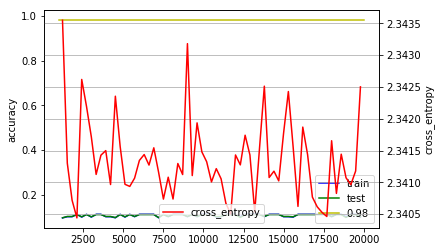

In [30]:
# 绘图

# 子图一: 正确率
ax1 = plt.figure().add_subplot(111)
ax1.plot(df['train'], label='train', color='b')
ax1.plot(df['test'], label='test', color='g')
ax1.plot([1000,20000], [0.98,0.98], label='0.98', color='y')
#ax1.set_ylim([0.970, 0.984])
ax1.set_ylabel('accuracy')
ax1.legend(loc=4)

# 子图一: 交叉熵
ax2 = ax1.twinx()  
ax2.plot(df['c_e'],label='cross_entropy', color='r')
#ax2.set_ylim([0.072, 0.100])
ax2.set_ylabel('cross_entropy')
ax2.legend(loc=8)

plt.grid(True, linestyle = "-")
plt.show()

In [31]:
df.T

,1200,1500,1800,2100,2400,2700,3000,3300,3600,3900,...,17100,17400,17700,18000,18300,18600,18900,19200,19500,19800
c_e,2.343547,2.341301,2.340717,2.340441,2.342617,2.342191,2.341714,2.341124,2.341427,2.341498,...,2.340616,2.340528,2.340463,2.341653,2.340826,2.341442,2.341071,2.340963,2.341178,2.342500
test,0.097982,0.103909,0.103909,0.112345,0.102509,0.112345,0.102509,0.112345,0.112345,0.103909,...,0.112345,0.112345,0.112345,0.103909,0.112345,0.112345,0.099455,0.112345,0.112345,0.102509
train,0.097400,0.102800,0.102800,0.113500,0.101000,0.113500,0.101000,0.113500,0.113500,0.102800,...,0.113500,0.113500,0.113500,0.102800,0.113500,0.113500,0.103200,0.113500,0.113500,0.101000


毫无疑问，这个模型是一个非常简陋，性能也不理想的模型。目前只能达到92%左右的准确率。
接下来，希望大家利用现有的知识，将这个模型优化至98%以上的准确率。
Hint：
- 多隐层
- 激活函数
- 正则化**对W1和b1加正则,正确率为94%,下降了**
- 初始化
- 摸索一下各个超参数
  - 隐层神经元数量
  - 学习率
  - 正则化惩罚因子
  - 最好每隔几个step就对loss、accuracy等等进行一次输出，这样才能有根据地进行调整

## 加隐层,加正则

In [55]:
# Create the model
x = tf.placeholder(tf.float32, [None, 784])
W1 = tf.Variable(tf.truncated_normal([784,200],stddev=0.1))
b1 = tf.Variable(tf.zeros([200]))
W2 = tf.Variable(tf.truncated_normal([200,200],stddev=0.1))
b2 = tf.Variable(tf.zeros([200]))
W3 = tf.Variable(tf.truncated_normal([200,200],stddev=0.1))
b3 = tf.Variable(tf.zeros([200]))
W4 = tf.Variable(tf.truncated_normal([200,200],stddev=0.1))
b4 = tf.Variable(tf.zeros([200]))
W5 = tf.Variable(tf.zeros([200, 10]))
b5 = tf.Variable(tf.zeros([10]))

In [56]:
# 添加隐层
hidden1 = tf.nn.sigmoid(tf.matmul(x,W1)+b1)
hidden2 = tf.nn.tanh(tf.matmul(hidden1,W2)+b2)
hidden3 = tf.nn.relu6(tf.matmul(hidden2,W3)+b3)
hidden4 = tf.nn.relu(tf.matmul(hidden3,W4)+b4)
y = tf.matmul(hidden4, W5) + b5
y_ = tf.placeholder(tf.float32, [None, 10])

In [64]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y))\
    +tf.contrib.layers.l1_regularizer(0.00005)(W1,b1)\
    +tf.contrib.layers.l1_regularizer(0.00005)(W2,b2)\
    +tf.contrib.layers.l1_regularizer(0.00005)(W3,b3)\
    +tf.contrib.layers.l1_regularizer(0.00005)(W4,b4)

In [65]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [66]:
sess = tf.Session()
init_op = tf.global_variables_initializer()
sess.run(init_op)

In [67]:
# 开始训练,Train

# 设置正确率计算公式
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

a_ce={'train':[],'test':[],'c_e':[]}#用于存放正确率和交叉熵
#{'acc': accuracy, 'c_e': cross_entropy}
for _ in range(20000):
    # 每次获取小批量的数据
    batch_xs, batch_ys = mnist.train.next_batch(100)
    # 执行train_step
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    if _ %300==0:
        #将正确率和交叉熵分别添加进各自的list
        a_ce['train'].append(sess.run(accuracy, feed_dict={x: mnist.test.images,y_: mnist.test.labels}))
        a_ce['c_e'].append(sess.run(cross_entropy, feed_dict={x: mnist.test.images,y_: mnist.test.labels}))
        a_ce['test'].append(sess.run(accuracy, feed_dict={x: mnist.train.images,y_: mnist.train.labels}))

In [68]:
# 将得到的正确率和交叉熵转换成DataFrame
df=pd.DataFrame(data=a_ce,index=[x for x in range(20000) if x%300==0])
# 删除前几列的异常点
df.drop([0,300,600,900],inplace=True)

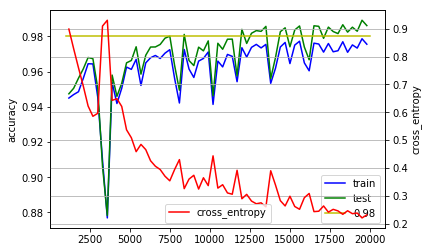

In [69]:
# 绘图

# 子图一: 正确率
ax1 = plt.figure().add_subplot(111)
ax1.plot(df['train'], label='train', color='b')
ax1.plot(df['test'], label='test', color='g')
ax1.plot([1000,20000], [0.98,0.98], label='0.98', color='y')
#ax1.set_ylim([0.970, 0.984])
ax1.set_ylabel('accuracy')
ax1.legend(loc=4)

# 子图一: 交叉熵
ax2 = ax1.twinx()  
ax2.plot(df['c_e'],label='cross_entropy', color='r')
#ax2.set_ylim([0.072, 0.100])
ax2.set_ylabel('cross_entropy')
ax2.legend(loc=8)

plt.grid(True, linestyle = "-")
plt.show()

In [70]:
df.T

,1200,1500,1800,2100,2400,2700,3000,3300,3600,3900,...,17100,17400,17700,18000,18300,18600,18900,19200,19500,19800
c_e,0.898781,0.827876,0.759726,0.694064,0.622456,0.585503,0.596100,0.909673,0.930462,0.642692,...,0.263410,0.241281,0.251321,0.245687,0.233424,0.246173,0.235710,0.238014,0.220506,0.231488
test,0.947418,0.950582,0.956291,0.961582,0.968055,0.967364,0.950836,0.906291,0.878273,0.958055,...,0.978964,0.985309,0.982800,0.981636,0.986673,0.982473,0.985273,0.982982,0.989218,0.986182
train,0.945000,0.947000,0.948600,0.956200,0.964500,0.964400,0.945700,0.909700,0.876900,0.953800,...,0.971100,0.976000,0.971300,0.971900,0.977000,0.971000,0.975200,0.973400,0.978700,0.975600


加了隐层,加了正则,正确率为97%, 依然下降

## 结论

不应当加正则

## 定义交叉熵